# Exploratory data analysis in Python.

## Let us understand how to explore the data in python.



![alt text](https://moriohcdn.b-cdn.net/ff3cc511fb.png)


Image Credits: Morioh

## Introduction

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today ?**


We obtained a fascinating dataset about mobile usage. The data-set can be downloaded from [here](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset). This dataset has 700 rows and 11 columns detailing various aspects of user interactions with their devices. It includes features like Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, and User Behavior Class. In this tutorial, we’ll explore this data and prepare it for modeling. 



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

For most of the team we essentially did the same thing for this section. In the following sections we included what we each did with comments. Please note the sections and names.

In [18]:
df = pd.read_csv("./user_behavior_dataset.csv")
# To display the top 5 rows 
df.head(5)               

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [20]:
df.tail(5)                        # To display the botton 5 rows

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3




---



## 3. Dropping the duplicate rows, missing or null value, and irrelevant columns - Soad Ahmed

In [22]:
df = df.drop(['Operating System','App Usage Time (min/day)','Battery Drain (mAh/day)'],axis=1)
df.head(5)

,User ID,Device Model,Screen On Time (hours/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,6.4,67,1122,40,Male,4
1,2,OnePlus 9,4.7,42,944,47,Female,3
2,3,Xiaomi Mi 11,4.0,32,322,42,Male,2
3,4,Google Pixel 5,4.8,56,871,20,Male,3
4,5,iPhone 12,4.3,58,988,31,Female,3


In [24]:
df.shape

(700, 8)

In [28]:
df.count()

User ID                       700
Device Model                  700
Screen On Time (hours/day)    700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
User Behavior Class           700
dtype: int64

In [26]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [30]:
df = df.drop_duplicates()
df.head(5)

,User ID,Device Model,Screen On Time (hours/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,6.4,67,1122,40,Male,4
1,2,OnePlus 9,4.7,42,944,47,Female,3
2,3,Xiaomi Mi 11,4.0,32,322,42,Male,2
3,4,Google Pixel 5,4.8,56,871,20,Male,3
4,5,iPhone 12,4.3,58,988,31,Female,3


In [32]:
df.count()

User ID                       700
Device Model                  700
Screen On Time (hours/day)    700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
User Behavior Class           700
dtype: int64

In [34]:
print(df.isnull().sum())

User ID                       0
Device Model                  0
Screen On Time (hours/day)    0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [36]:
df = df.dropna()    # Dropping the missing values.
df.count()

User ID                       700
Device Model                  700
Screen On Time (hours/day)    700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
User Behavior Class           700
dtype: int64

In [38]:
print(df.isnull().sum())# After dropping the values

User ID                       0
Device Model                  0
Screen On Time (hours/day)    0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


## 4. Dropping irrelevant columns - Soad Ahmed

In [41]:
df = df.rename(columns={"User ID": "ID", "Device Model": "Model", "Screen On Time (hours/day)": "Screen Time", "Data Usage (MB/day)": "Usage","User Behavior Class": "Behavior","Number of Apps Installed": "Apps Installed" })
df.head(5) 

,ID,Model,Screen Time,Apps Installed,Usage,Age,Gender,Behavior
0,1,Google Pixel 5,6.4,67,1122,40,Male,4
1,2,OnePlus 9,4.7,42,944,47,Female,3
2,3,Xiaomi Mi 11,4.0,32,322,42,Male,2
3,4,Google Pixel 5,4.8,56,871,20,Male,3
4,5,iPhone 12,4.3,58,988,31,Female,3


In [43]:
df

,ID,Model,Screen Time,Apps Installed,Usage,Age,Gender,Behavior
0,1,Google Pixel 5,6.4,67,1122,40,Male,4
1,2,OnePlus 9,4.7,42,944,47,Female,3
2,3,Xiaomi Mi 11,4.0,32,322,42,Male,2
3,4,Google Pixel 5,4.8,56,871,20,Male,3
4,5,iPhone 12,4.3,58,988,31,Female,3
...,...,...,...,...,...,...,...,...
695,696,iPhone 12,3.9,26,381,22,Male,2
696,697,Xiaomi Mi 11,6.8,68,1201,59,Male,4
697,698,Google Pixel 5,3.1,22,457,50,Female,2
698,699,Samsung Galaxy S21,1.7,13,224,44,Male,1


## 5. Detecting Outliers - Soad Ahmed

<Axes: xlabel='Screen Time'>

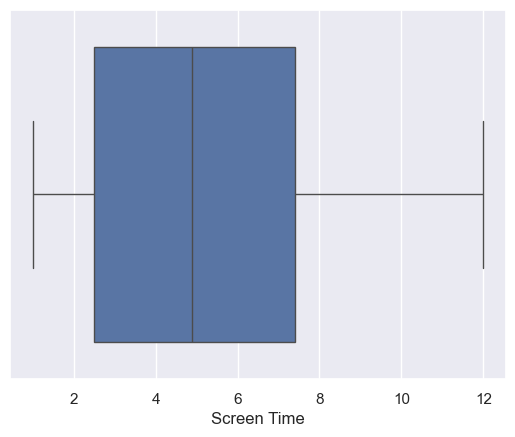

In [46]:
sns.boxplot(x=df['Screen Time'])

<Axes: xlabel='Usage'>

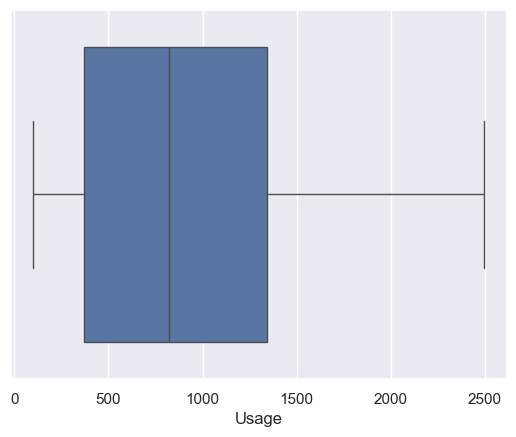

In [48]:
sns.boxplot(x=df['Usage'])

<Axes: xlabel='Behavior'>

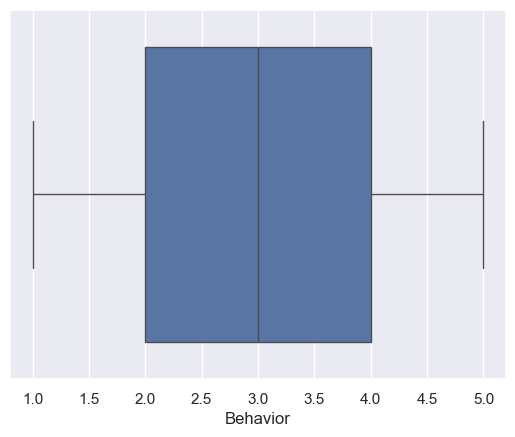

In [50]:
sns.boxplot(x=df['Behavior'])

## 6. Plot against frequency (histogram)- Soad Ahmed

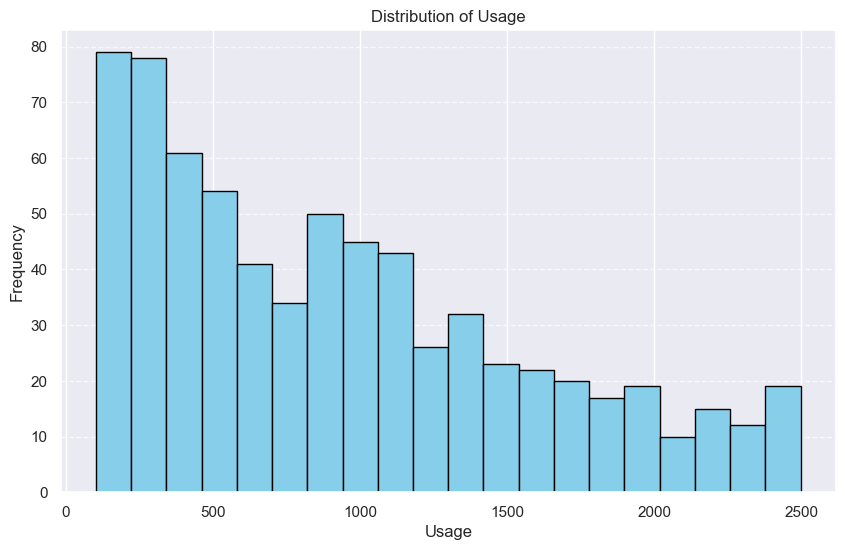

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['Usage'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

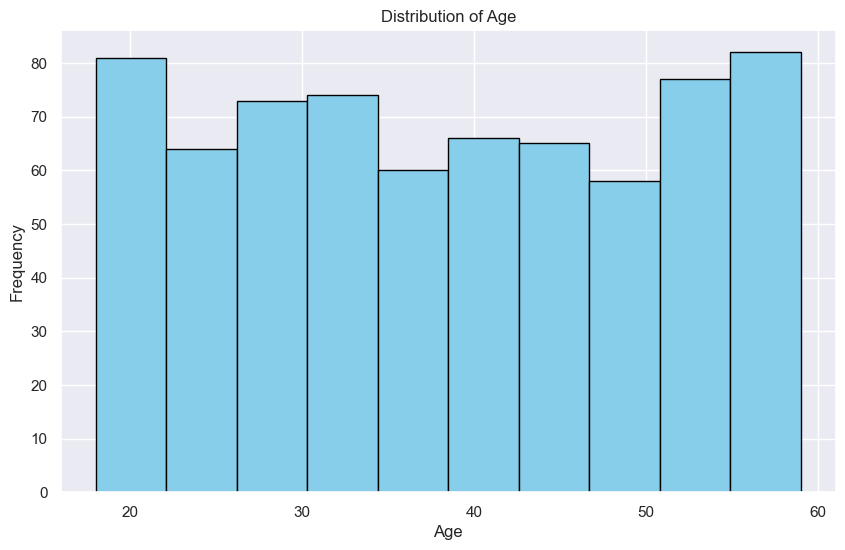

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

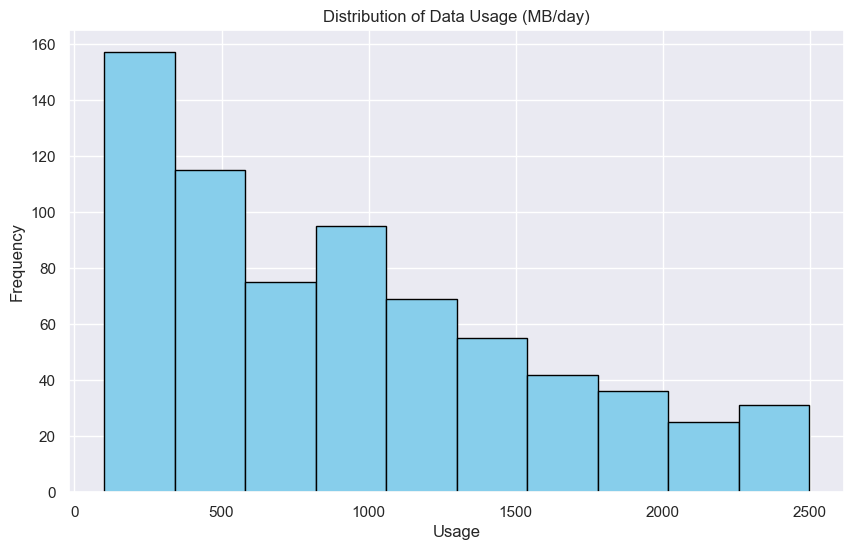

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df['Usage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Usage')
plt.ylabel('Frequency')

## 7. Plot against one another (scatter) - Soad Ahmed

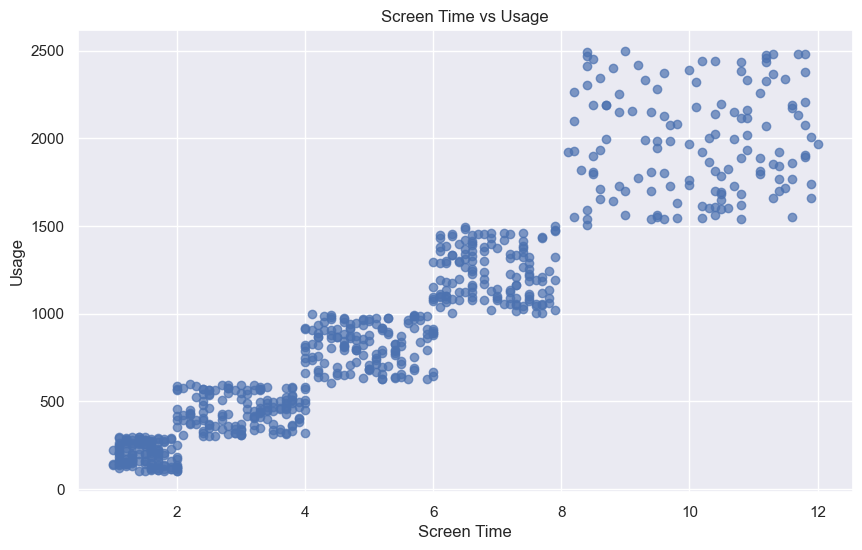

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Screen Time'], df['Usage'], alpha=0.7)
plt.title('Screen Time vs Usage')
plt.xlabel('Screen Time')
plt.ylabel('Usage')
plt.grid(True)
plt.show()

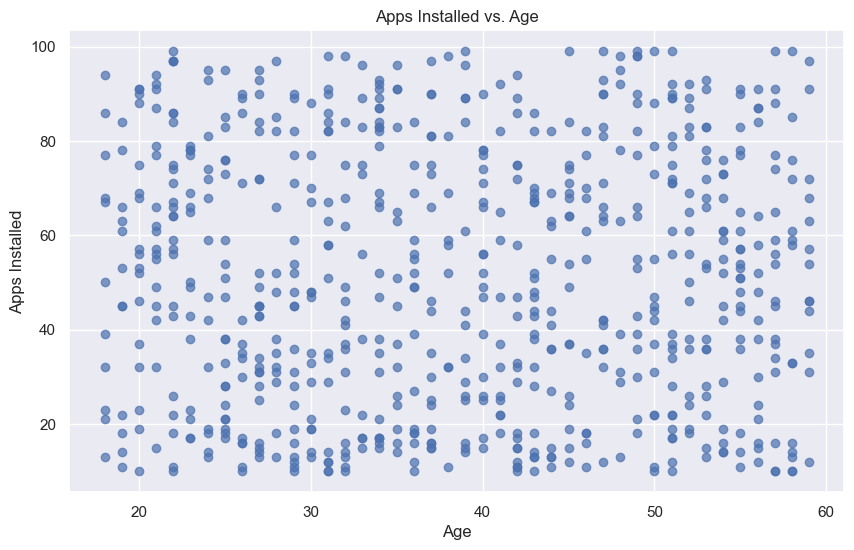

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Apps Installed'], alpha=0.7)  
plt.title('Apps Installed vs. Age') 
plt.xlabel('Age')
plt.ylabel('Apps Installed') 
plt.grid(True) 
plt.show() 



---



## 3. Checking the types of data - Cristian Zendejas

In [84]:
# resetting the data for this section
df = pd.read_csv("./user_behavior_dataset.csv")

Checking the data types to make sure they are all in the formats we expect so we can use them.

In [87]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

## 4. Dropping irrelevant columns - Cristian Zendejas

#### I didn't think the user behavior class was valuable to us since we don't know the original definition of what this column means. So I decided to remove it.

In [91]:
df = df.drop(['User Behavior Class'], axis=1)
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


## 5. Renaming the columns - Cristian Zendejas

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

I decided to rename some of the columns to something simpler for visualization purposes.

In [96]:
df = df.rename(columns={"Device Model": "Device", "Operating System": "OS", "Number of Apps Installed": "# of Apps Installed"})
df.head(5)

,User ID,Device,OS,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),# of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female




---



## 6. Dropping the duplicate rows - Cristian Zendejas

In [83]:
df.shape

(700, 8)

In [98]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


Now let us remove the duplicate data because it's ok to remove them.

In [101]:
df.count()      # Used to count the number of rows

User ID                       700
Device                        700
OS                            700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
# of Apps Installed           700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64

##### no duplicates for this data!

In [103]:
df = df.drop_duplicates()
df.head(5)

,User ID,Device,OS,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),# of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [105]:
# We can see that dropping duplicates made no difference.
df.count()

User ID                       700
Device                        700
OS                            700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
# of Apps Installed           700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64



---



## 7. Dropping the missing or null values. - Cristian Zendejas

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [109]:
print(df.isnull().sum())

User ID                       0
Device                        0
OS                            0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
# of Apps Installed           0
Data Usage (MB/day)           0
Age                           0
Gender                        0
dtype: int64


#### No null values either!

In [112]:
df = df.dropna()    # Dropping the missing values.
df.count()

User ID                       700
Device                        700
OS                            700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
# of Apps Installed           700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64

#### We can see that nothing changed.

In [115]:
print(df.isnull().sum())   # After dropping the values

User ID                       0
Device                        0
OS                            0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
# of Apps Installed           0
Data Usage (MB/day)           0
Age                           0
Gender                        0
dtype: int64




---



## 8. Detecting Outliers - Cristian Zendejas

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

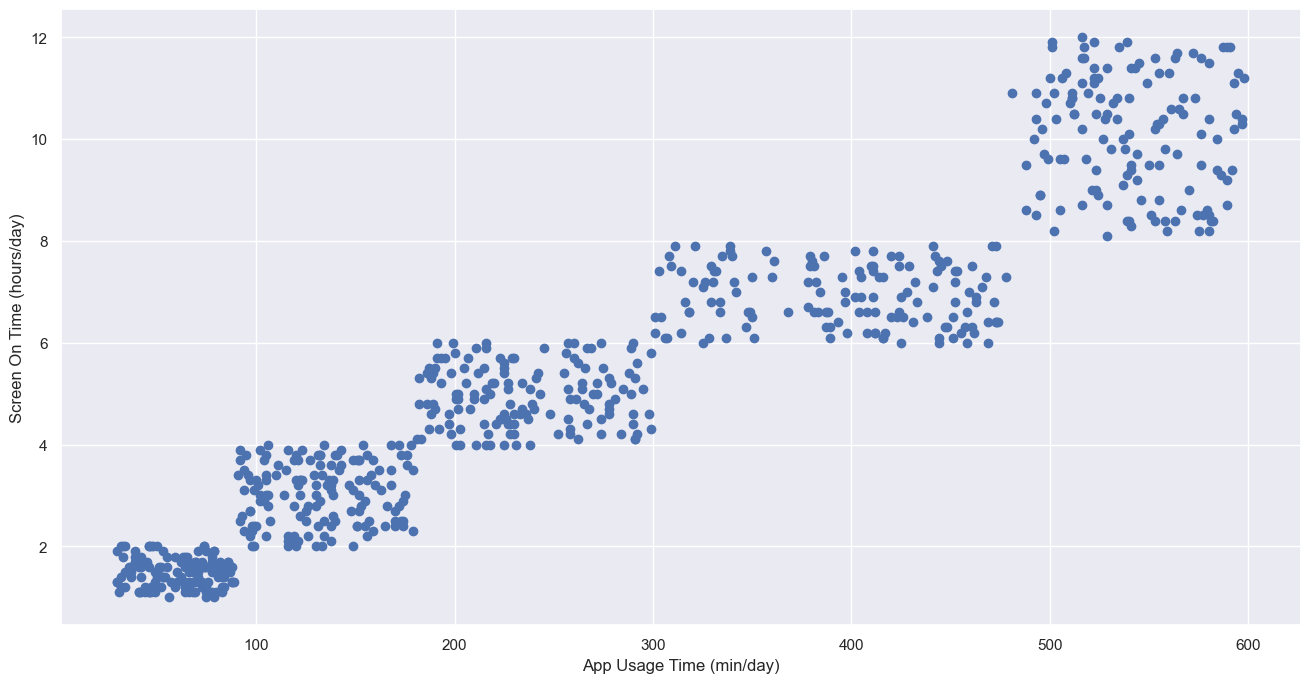

In [118]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['App Usage Time (min/day)'], df['Screen On Time (hours/day)'])
ax.set_xlabel('App Usage Time (min/day)')
ax.set_ylabel('Screen On Time (hours/day)')
plt.show()
# we get some interesting visuals for this one. There seem to be distinct clusters for each range of app usage time.

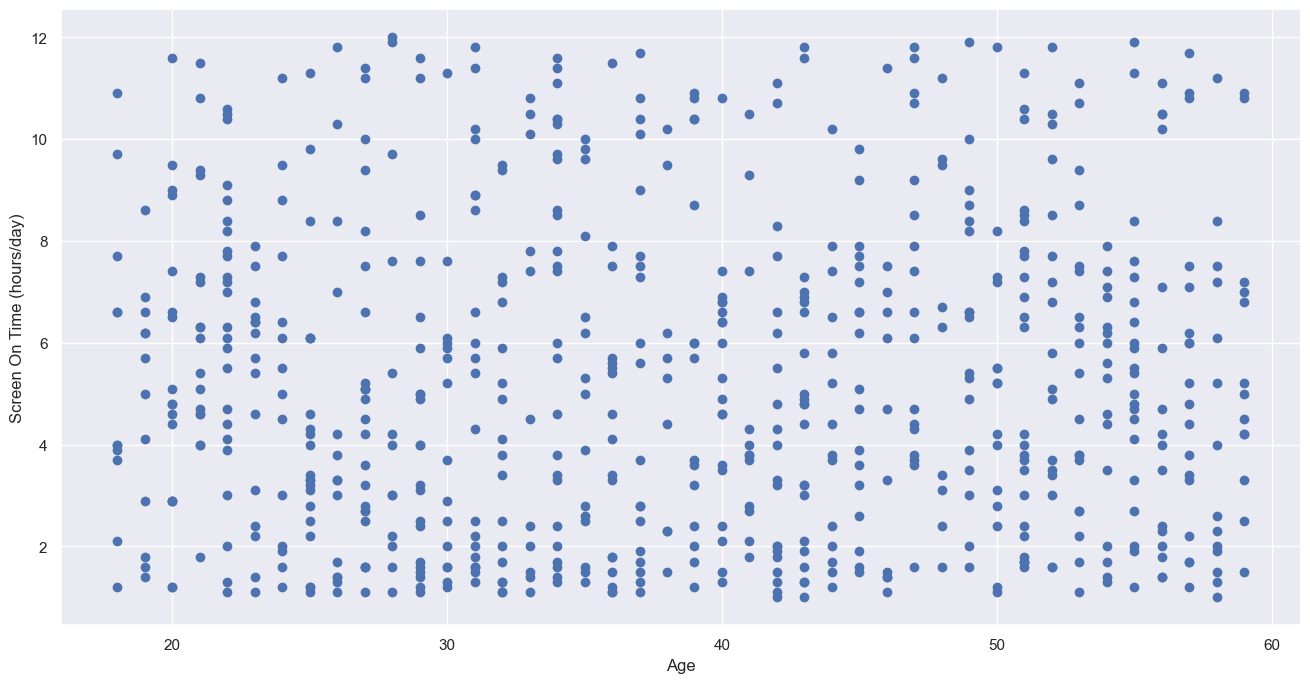

In [121]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Age'], df['Screen On Time (hours/day)'])
ax.set_xlabel('Age')
ax.set_ylabel('Screen On Time (hours/day)')
plt.show()
# This plot didn't show much distinction between the variables.

<Axes: xlabel='Screen On Time (hours/day)'>

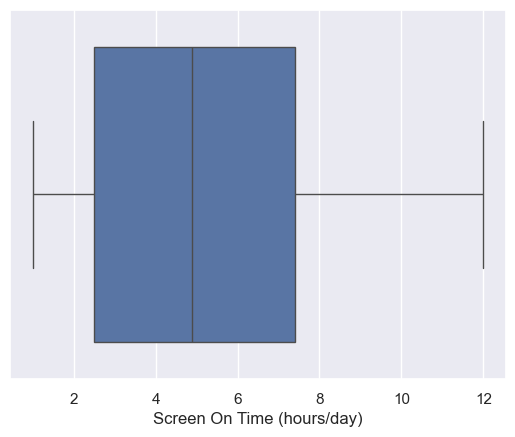

In [125]:
sns.boxplot(x=df['Screen On Time (hours/day)'])
# our data was also pretty consistent as we can see that there aren't any outliers!

<Axes: xlabel='App Usage Time (min/day)'>

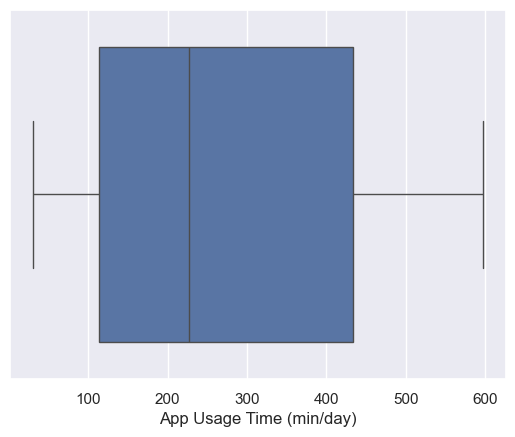

In [127]:
sns.boxplot(x=df['App Usage Time (min/day)'])

In [131]:
# select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

User ID                        349.50
App Usage Time (min/day)       321.00
Screen On Time (hours/day)       4.90
Battery Drain (mAh/day)       1507.25
# of Apps Installed             48.00
Data Usage (MB/day)            968.00
Age                             21.00
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [133]:
df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) |(numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(700, 7)

Only a few outliers were removed.



---



## 9. Plot different features against one another (scatter), against frequency (histogram) - Cristian Zendejas

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval.

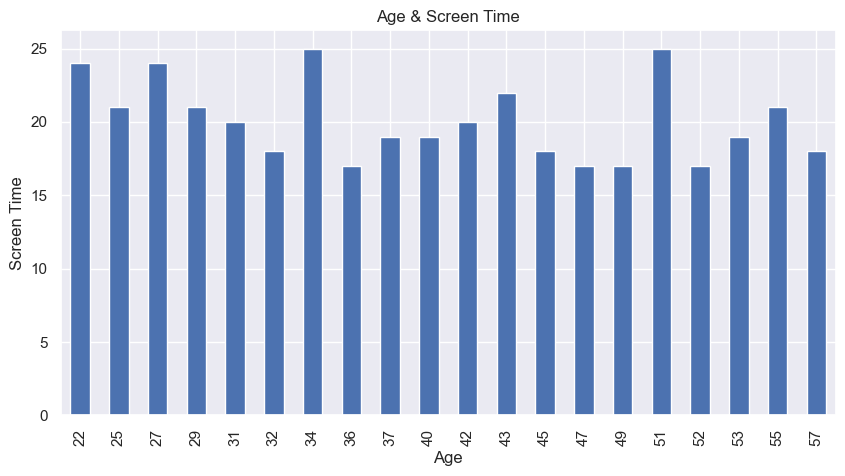

In [139]:
df.Age.value_counts().nlargest(20).sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Age & Screen Time")
plt.ylabel('Screen Time')
plt.xlabel('Age');
# I didn't see any big differences between age and screen time. No matter what age group there seems to be a consistent amount of screen time.

### Heat Maps - Cristian Zendejas

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

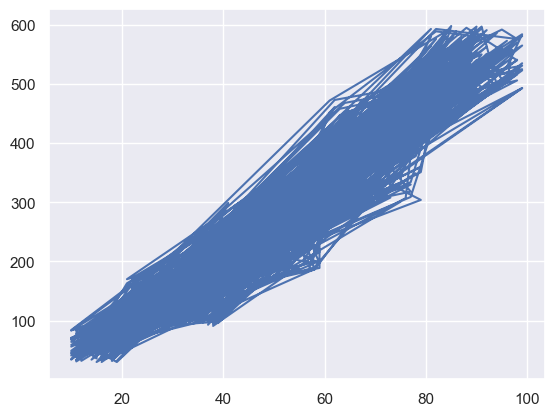

In [136]:
plt.plot(df['# of Apps Installed'],df['App Usage Time (min/day)'])
#This plot proved to be very hard to read since the amount of apps are too close in value.



---



In [138]:
sns.set(color_codes=True)

In [140]:
# resetting the data for this section
df = pd.read_csv("user_behavior_dataset.csv")



---



## 4.  Dropping irrelevant columns - Mengyuan Cui

In [144]:
# I recomend to drop the column User Behavior Class-classification of user behavior based on usage patterns (1 to 5).) because we do not
# know the patterns. 
df = df.drop(['User Behavior Class'], axis=1)
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


## 6. Dropping the duplicate rows - Mengyuan Cui

In [147]:
df.shape

(700, 10)

In [149]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [153]:
df.count()

User ID                       700
Device Model                  700
Operating System              700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64

In [155]:
df = df.drop_duplicates()
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [157]:
df.count()

User ID                       700
Device Model                  700
Operating System              700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64

## 8. Detecting Outliers - Mengyuan Cui

<Axes: xlabel='App Usage Time (min/day)'>

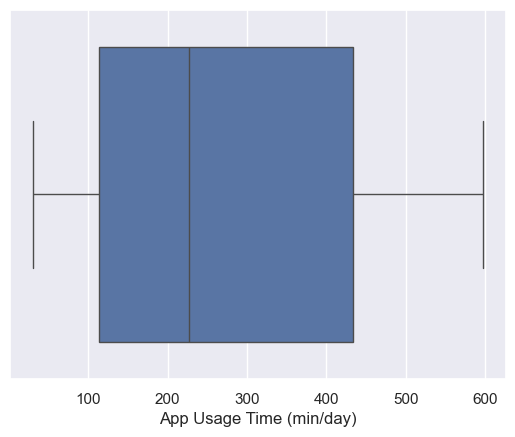

In [160]:
sns.boxplot(x=df['App Usage Time (min/day)'])

<Axes: xlabel='Screen On Time (hours/day)'>

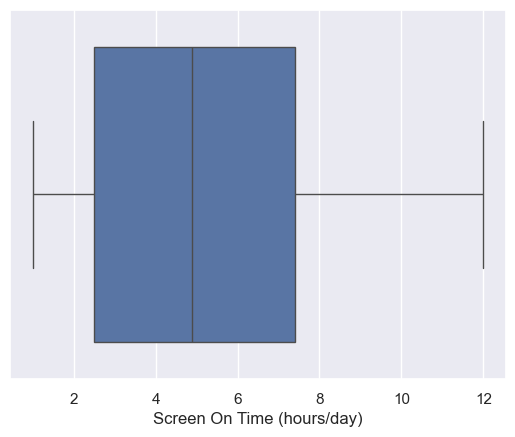

In [162]:
sns.boxplot(x=df['Screen On Time (hours/day)'])

<Axes: xlabel='Battery Drain (mAh/day)'>

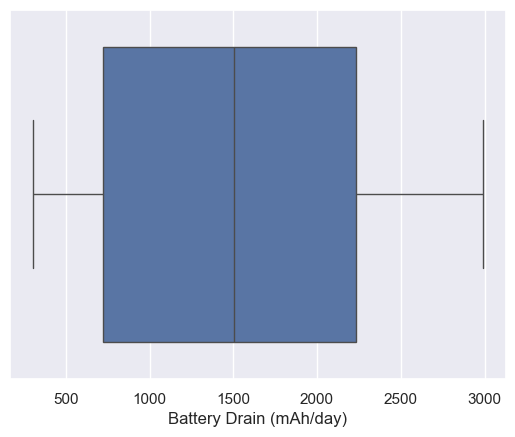

In [164]:
sns.boxplot(x=df['Battery Drain (mAh/day)'])

<Axes: xlabel='Number of Apps Installed'>

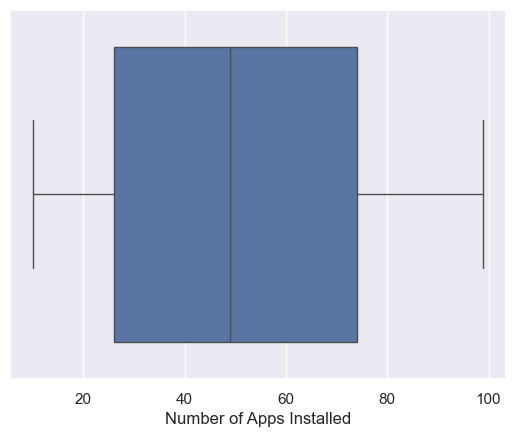

In [166]:

sns.boxplot(x=df['Number of Apps Installed'])

<Axes: xlabel='Data Usage (MB/day)'>

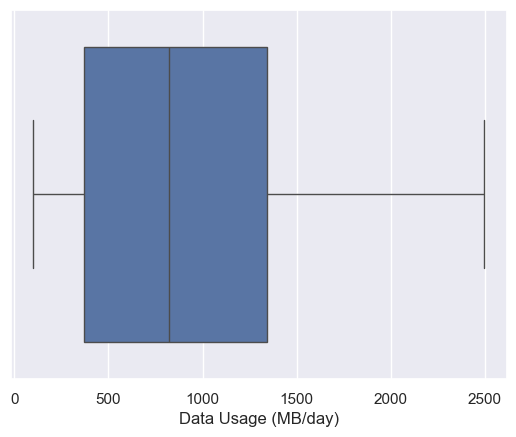

In [168]:
sns.boxplot(x=df['Data Usage (MB/day)'])

In [175]:
print(df.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender'],
      dtype='object')


Text(0.5, 0, 'User ID')

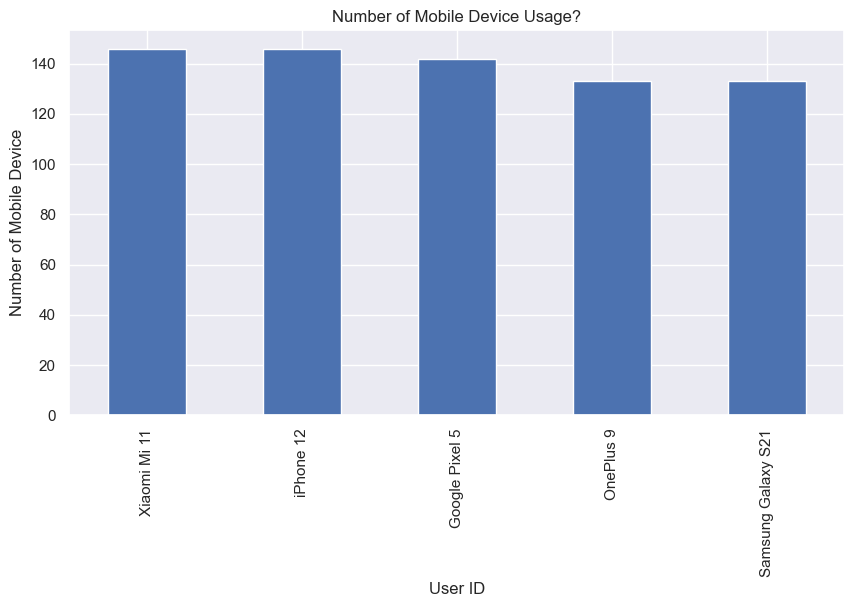

In [177]:
df['Device Model'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Mobile Device Usage?")
plt.ylabel('Number of Mobile Device')
plt.xlabel('User ID')

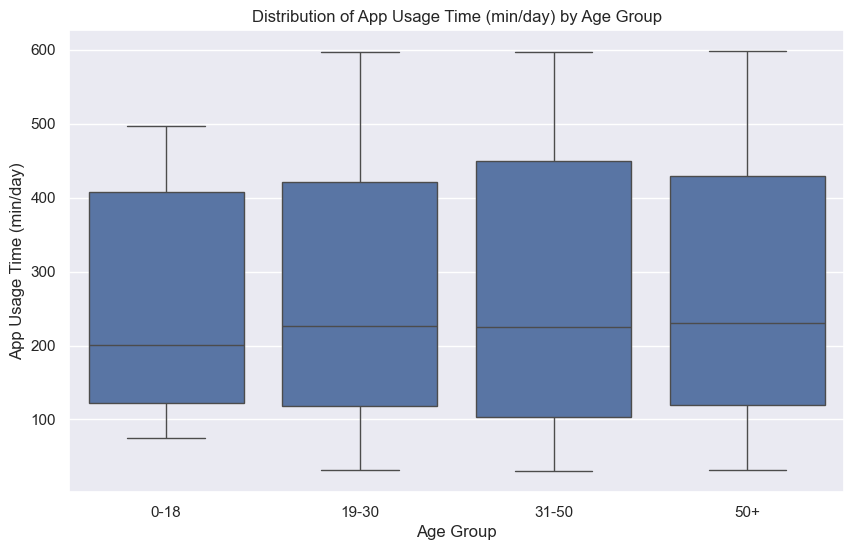

In [179]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '50+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='App Usage Time (min/day)', data=df)
plt.xlabel('Age Group')
plt.ylabel('App Usage Time (min/day)')
plt.title('Distribution of App Usage Time (min/day) by Age Group')
plt.show()



---



## 1. Data Overview - Matthew Henning

In [183]:
# resetting the data
data = pd.read_csv('user_behavior_dataset.csv')

In [185]:
# Display the first few rows
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## 2. Descriptive Statistics - Matthew Henning

In [188]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [190]:
# Generate descriptive statistics for numerical columns
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## 3. Data Visualization - Matthew Henning

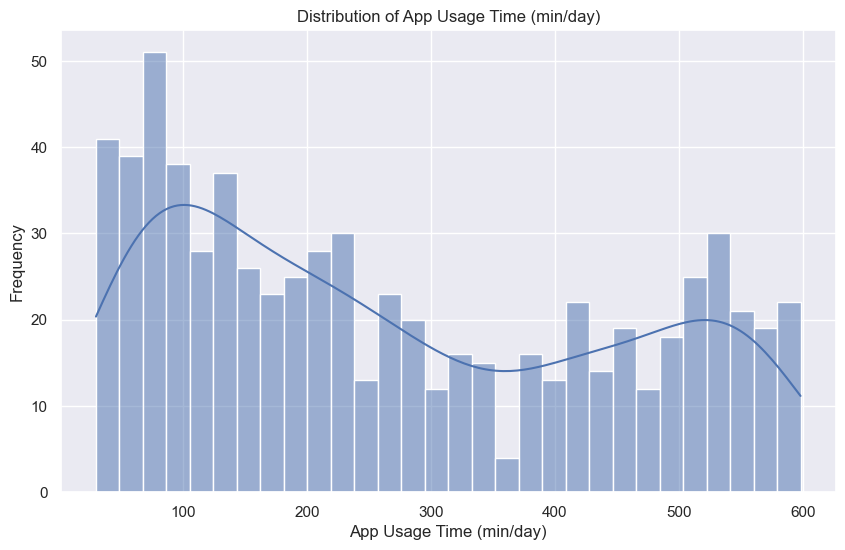

In [192]:
# Distribution of App Usage Time
plt.figure(figsize=(10, 6))
sns.histplot(data['App Usage Time (min/day)'], kde=True, bins=30)
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

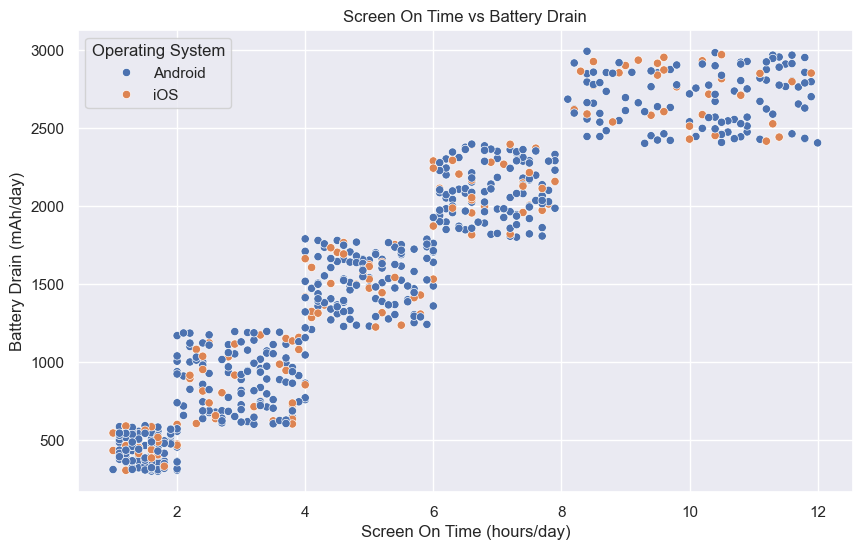

In [195]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='Operating System', data=data)
plt.title('Screen On Time vs Battery Drain')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.legend(title='Operating System')
plt.show()

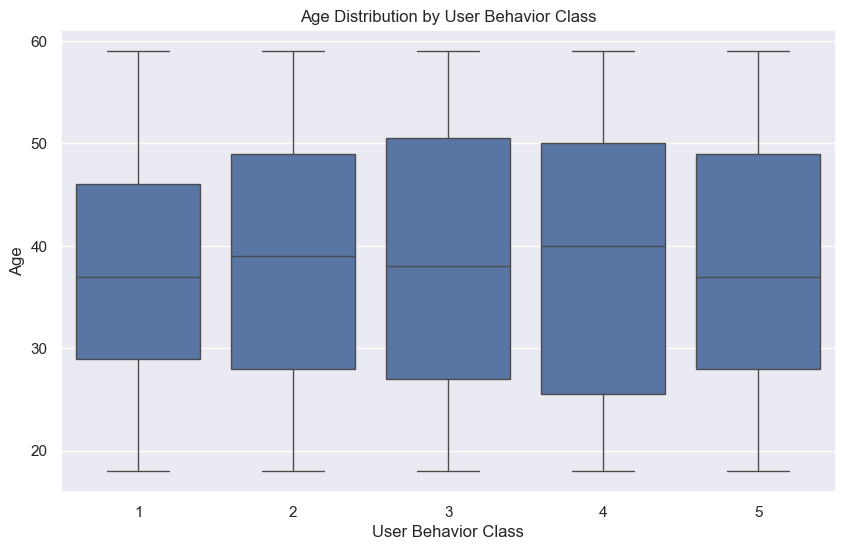

In [197]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='User Behavior Class', y='Age', data=data)
plt.title('Age Distribution by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Age')
plt.show()

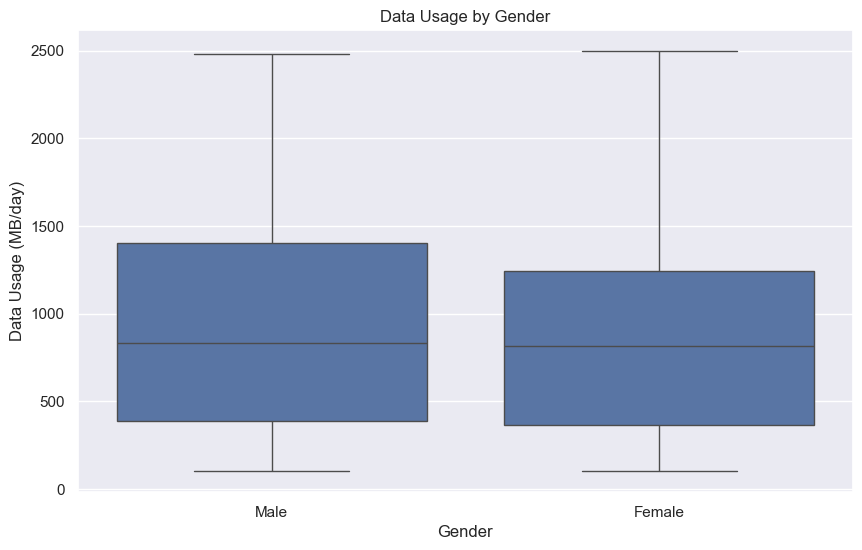

In [199]:
# Data Usage by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Data Usage (MB/day)', data=data)
plt.title('Data Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Data Usage (MB/day)')
plt.show()

## 4. Insights and Conclusion - Matthew Henning



---



**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.